# Exercise 7: Neural Networks using PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

We are using again the wine-data from Exercise 4, but now building a neural network for prediction.

In [2]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])



data: (4898, 12)
First example:
Features: [6.6000e+00 2.8500e-01 4.9000e-01 1.1400e+01 3.5000e-02 5.7000e+01
 1.3700e+02 9.9732e-01 3.0800e+00 5.4000e-01 8.9000e+00]
Quality: 6.0


Below is the simple 2-layer NN from last week implemented using PyTorch. In addition to the network we define the loss function and optimiser

In [3]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First layer of the network
        # 11 inputs, 20 outputs
        self.fc1 = nn.Linear(11,20) 
        
        # Second layer of the network
        # 20 inputs, 1 output
        self.fc2 = nn.Linear(20,1)
        
        # Relu activation function
        self.relu = nn.ReLU()

    
    def forward(self, x):
        
        # Apply the network to a given matrix of inputs x
        
        out = self.fc1(x) # apply first layer
        out = self.relu(out) # apply activation function
        out = self.fc2(out) # apply second layer
        return out

# Which device to use for NN calculations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

# Create network object
model = NeuralNet().to(device)

# Loss function
criterion = nn.MSELoss()
# Optimisation: SGD = stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
 
# Keep track of the losses 
train_losses = []
test_losses = []

# Training loop and evaluation below

The code below trains the network for 20 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

/Users/gregor/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Train Loss: 0.805985140723288 Test Loss: 0.749298921802552
Epoch: 1 Train Loss: 0.8059613692796844 Test Loss: 0.7497900635262861
Epoch: 2 Train Loss: 0.805945637111583 Test Loss: 0.7497405202149325
Epoch: 3 Train Loss: 0.8059244017305748 Test Loss: 0.7496532404106957
Epoch: 4 Train Loss: 0.8059105856594591 Test Loss: 0.7496149909464842
Epoch: 5 Train Loss: 0.8058143475430454 Test Loss: 0.749365963621582
Epoch: 6 Train Loss: 0.8054768629985879 Test Loss: 0.7488567340912852
Epoch: 7 Train Loss: 0.8050132091799475 Test Loss: 0.7480917180959794
Epoch: 8 Train Loss: 0.8038105106361689 Test Loss: 0.7465911518026298
Epoch: 9 Train Loss: 0.8037590176887731 Test Loss: 0.7463055605058723
Epoch: 10 Train Loss: 0.8037241080493016 Test Loss: 0.7460686837062696
Epoch: 11 Train Loss: 0.8037020211362759 Test Loss: 0.7458901399481874
Epoch: 12 Train Loss: 0.8036731102545809 Test Loss: 0.7457570644451976
Epoch: 13 Train Loss: 0.8036764515610081 Test Loss: 0.7456733160450678
Epoch: 14 Train Loss

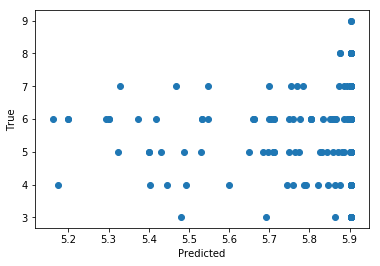

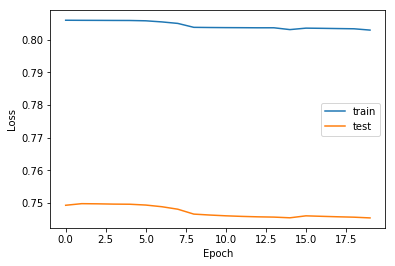

In [4]:
# how many epochs to train
n_epochs = 20 # This will train for one epoch

train_examples = X_train.shape[0]

# Loop over the epochs
for ep in range(n_epochs):
                
    # Each epoch is a complete loop over the training data
    for i in range(train_examples):
        
        # Reset gradient
        optimizer.zero_grad()
        
        # Convert x and y to proper objects for PyTorch
        x = torch.tensor(X_train[i],dtype=torch.float)
        y = torch.tensor(y_train[i],dtype=torch.float)

        # Apply the network 
        net_out = model(x)
                
        # Calculate the loss function
        loss = criterion(net_out,y)
                
        # Calculate the gradients
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        
    # Calculate predictions for the full training and testing sample
    y_pred_train = model(torch.tensor(X_train,dtype=torch.float)).detach().numpy().flatten()
    y_pred = model(torch.tensor(X_test,dtype=torch.float)).detach().numpy().flatten()

    # Calculate aver loss / example over the epoch
    train_loss = np.mean((y_pred_train-y_train)**2)
    test_loss = np.mean((y_pred-y_test)**2)
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss,  "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    
# Prepare scatter plot
y_pred =  model(torch.tensor(X_test,dtype=torch.float)).detach().numpy().flatten()


print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()



# Homework

This week's goal is to gain familiarty with the PyTorch library which we will be using for the rest of the week. It is documented [here]
    * Currently SGD is used without momentum. Try training with a momentum term (see the documentation of SGD)
    * Replace SGD with the Adam optimiser and train using that
    * Add two more hidden layers to the network (you can choose the number of nodes but make sure to apply the ReLu activation function after each) and train again
    * (more difficult) Instead of single examples, switch to training using batches of 5 examples. Note that the network can simply be applied to a matrix of multiple examples. In this case it will return a vector with one output per example
  
[here]: https://pytorch.org/docs/stable/index.html